# Day 29: Introduction to Decision Trees

A decision tree is a flow chart for classifying data into a class. It's a flow chart, but reverse engineered from examples rather than being built directly from known rules.

## Components of Decision Trees

A Decision Tree is a flowchart-like structure where each internal node represents a "decision" on an attribute, each branch represents an outcome of the decision, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

- **Decision Nodes**: Each decision node represents a test on an attribute, essentially asking a question about the data that divides the dataset into smaller subsets. The root decision node is the tree's starting point.

- **Branches**: Branches are the outcomes of the tests conducted at decision nodes. They represent the path from one question to the next or to a conclusion, depending on the tree's depth at that point.

- **Leaf Nodes**: Leaf nodes, or terminal nodes, represent the final decision or output of the decision process for a given subset of the dataset. In classification tasks, a leaf node corresponds to a class label. In regression tasks, it represents a continuous value.

## Functioning of Decision Trees

The process of building a decision tree involves selecting the best attribute to split the data at each step, aiming to increase the homogeneity of resultant subsets. This selection is generally based on metrics like entropy and information gain for classification tasks or variance reduction for regression. 

1. **Beginning at the root**, the dataset is split based on the attribute that results in the highest information gain (for classification) or the greatest variance reduction (for regression).

2. **For each split**, the algorithm recursively repeats the process for the resulting subsets. Each subset becomes associated with a new decision node in the tree. This recursive splitting continues until one of the stopping criteria is met, which could be a maximum tree depth, a minimum number of samples in a leaf, or a threshold for an increase in impurity measure.

3. **Classification Rules and Regression Paths**:
   - In classification, the path from the root node to a leaf node represents a set of conditions based on the attributes that lead to a specific class label.
   - In regression, this path represents conditions that lead to a continuous value prediction.


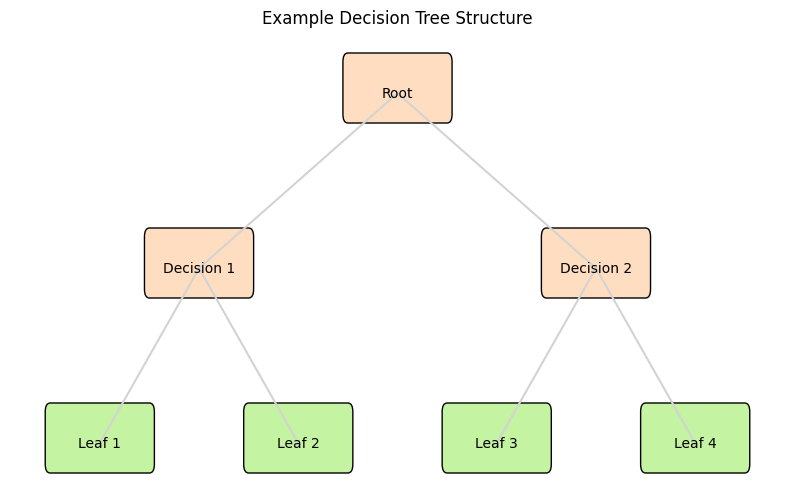

In [17]:
# Import necessary libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Coordinates of each node
nodes = {
    "Root": (5, 5),
    "Decision 1": (3, 4),
    "Decision 2": (7, 4),
    "Leaf 1": (2, 3),
    "Leaf 2": (4, 3),
    "Leaf 3": (6, 3),
    "Leaf 4": (8, 3)
}

# Lines connecting nodes to simulate branches
edges = [
    ("Root", "Decision 1"),
    ("Root", "Decision 2"),
    ("Decision 1", "Leaf 1"),
    ("Decision 1", "Leaf 2"),
    ("Decision 2", "Leaf 3"),
    ("Decision 2", "Leaf 4")
]

# Plot edges (branches)
for start, end in edges:
    start_x, start_y = nodes[start]
    end_x, end_y = nodes[end]
    ax.plot([start_x, end_x], [start_y, end_y], color="lightgrey")

bwidth, bheight = (1, 0.3)
# Plot nodes
for node, (x, y) in nodes.items():
    #ax.scatter(x, y, s=1000, c='skyblue')
    ax.text(x, y, node, ha='center', va='center')
    if "Leaf" in node:
        fc = "#C4F3A1"
    else:
        fc = "#FFDDC1"
    ax.add_patch(mpatches.FancyBboxPatch((x-bwidth/2, y-bheight*0.4), bwidth, bheight, boxstyle="round,pad=0.05", ec="black", fc=fc))


# Hide axes
ax.set_axis_off()

# Title
plt.title("Example Decision Tree Structure")

plt.show()



# Entropy and Information Gain in Decision Trees

Decision Trees are a popular machine learning method used for both classification and regression tasks. At their core, they model decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Two fundamental concepts that guide the construction of a decision tree are Entropy and Information Gain. Understanding these concepts is crucial for grasifying how decision trees decide where to split the data.

## What is Entropy?

Formally, a Decision Tree is a binary tree where each internal node splits the dataset into two groups based on the feature that results in the most significant information gain (IG). Information gain is calculated using metrics like Gini impurity or entropy.

In mathematical terms, if we denote a dataset as $D$ which consists of instances $(x_i, y_i), i=1,2,...,N$, where $x_i$ is the feature vector and $y_i$ is the target label, then the goal of the Decision Tree is to partition $D$ into subsets $D_1, D_2, ... , D_k$ based on feature values that optimize a given objective criterion (e.g., maximizing information gain).

**Entropy** is a concept borrowed from information theory, representing the degree of uncertainty or impurity present within a dataset. It is mathematically expressed as $H(X) = -\sum_{i=1}^{n} P(x_i) \log_2 P(x_i)$, where $P(x_i)$ stands for the probability of occurrence of class $x_i$. 

**Information gain** is then calculated as the reduction in entropy before and after a dataset is divided on an attribute. It guides the decision-tree algorithm in choosing the attribute that accomplishes the most significant reduction in uncertainty. Its formula is $IG(A, S) = H(S) - \sum_{t \in T} P(t) H(t)$, where $A$ is the attribute, $S$ is the dataset, $T$ represents the subsets created from splitting $S$ by attribute $A$, $H(S)$ is the entropy of set $S$, and $P(t)$ is the proportion of the number of elements in subset $t$ to the number of elements in set $S$.

Entropy is a measure borrowed from physics and information theory that represents the degree of disorder, randomness, or uncertainty in a dataset. In the context of machine learning, and more specifically in decision trees, it plays a pivotal role in determining how a dataset can be split in the most informative way.

In a classification problem, entropy can be mathematically expressed as:

$$ - \sum_{i=1}^{n} p_i \log_2(p_i) $$

where $n$ is the number of classes and $p_i$ is the probability of class $i$ within the subset. For each class, it multiplies the probability of class $i$ ($p_i$) by the log base 2 of $p_i$, sums across all classes, and takes the negative of that sum.

## What is Information Gain?

Information Gain is calculated as the difference between the initial entropy of the entire dataset and the weighted entropy after splitting the dataset based on an attribute. Mathematically, it's represented as:

$$ IG(D, A) = Entropy(D) - \sum_{v \in Values(A)} \frac{|D_v|}{|D|} Entropy(D_v) $$

where:
- $IG(D, A)$ is the information gain of dataset $D$ after being split based on attribute $A$,
- $Entropy(D)$ is the original entropy of the dataset,
- $Values(A)$ are the different values of attribute $A$,
- $|D_v|$ is the number of instances in $D$ that have value $v$ for attribute $A$,
- and $Entropy(D_v)$ is the entropy of the subset of $D$ that has value $v$ for attribute $A$.

## Intuition Through Example Plots

Entropy is a very heady and abstract topic, made all the more confusing by the various and *equally valid* ways to understand or interpret it.

Entropy is connected with uncertainty. A fair coin flip has maximum entropy, because all outcomes are equal and there's nothing you can do to increase your knowledge or make a better guess. After the coin flip, the entropy is zero, because your knowledge is complete and the system is in a known state with certainty.

Let's go with a **bag of marbles** analogy. if "red" and "blue" are our target classes, and there's an equal number of both, then we would have maximum entropy - a fair coin flip to guess the right label. But if we could split the bag of marbles based on some other information, we can gain information and make better guesses about the contents after that decision.

This is precisely what a decision tree does at each node: new decisions are added based on what would add the most information, so that the two sides of the node have less entropy.

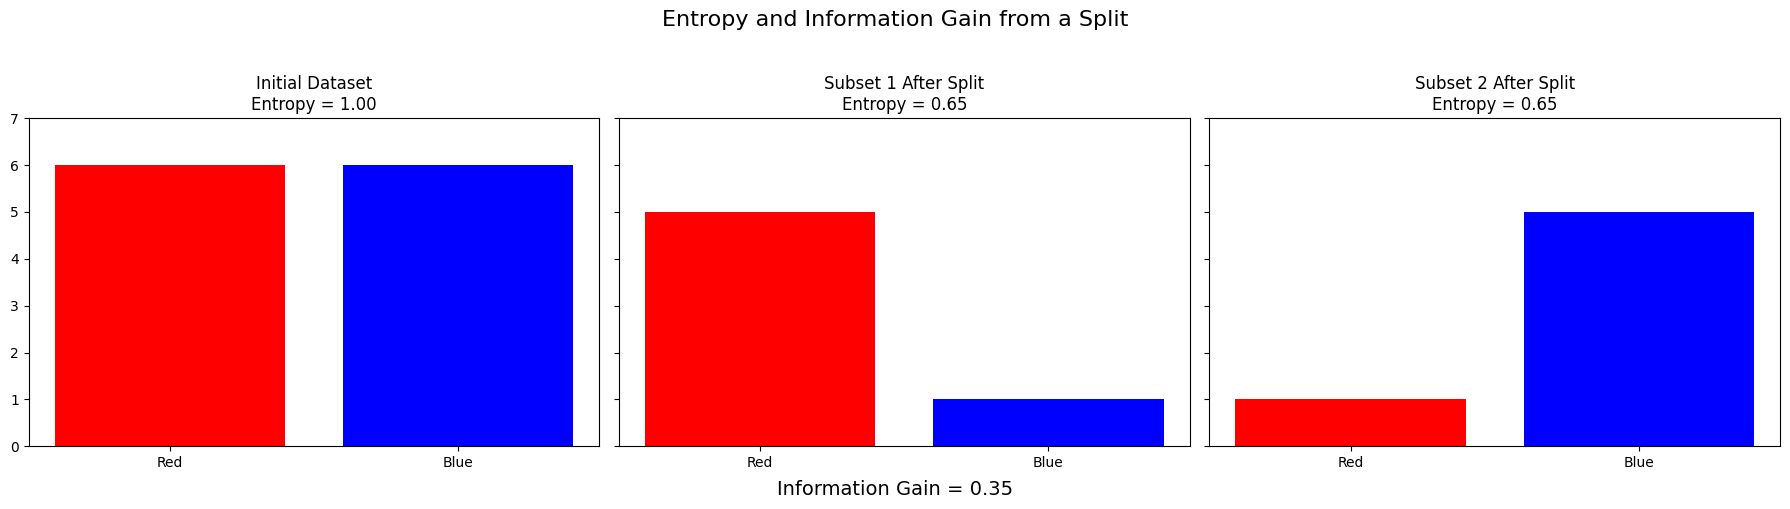

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset before and after split
# Suppose we have a binary classification problem with 'Red' and 'Blue' as classes
# Initially, the dataset is mixed: 6 Red and 6 Blue points
# After a split (for example, based on a certain feature), we get two subsets:
# Subset 1: 5 Red and 1 Blue, Subset 2: 1 Red and 5 Blue

# Function to calculate entropy
def entropy(elements):
    total = sum(elements)
    return -sum((p/total) * np.log2(p/total) for p in elements if p != 0)

# Initial entropy
initial_entropy = entropy([6, 6])

# Entropy after split
entropy_subset1 = entropy([5, 1])
entropy_subset2 = entropy([1, 5])

# Weighted entropy after split
weighted_entropy = (6/12) * entropy_subset1 + (6/12) * entropy_subset2

# Information Gain
information_gain = initial_entropy - weighted_entropy

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Initial dataset
ax[0].bar(['Red', 'Blue'], [6, 6], color=['red', 'blue'])
ax[0].set_title('Initial Dataset\nEntropy = {:.2f}'.format(initial_entropy))
ax[0].set_ylim(0, 7)

# Subset 1
ax[1].bar(['Red', 'Blue'], [5, 1], color=['red', 'blue'])
ax[1].set_title('Subset 1 After Split\nEntropy = {:.2f}'.format(entropy_subset1))

# Subset 2
ax[2].bar(['Red', 'Blue'], [1, 5], color=['red', 'blue'])
ax[2].set_title('Subset 2 After Split\nEntropy = {:.2f}'.format(entropy_subset2))

plt.suptitle('Entropy and Information Gain from a Split', fontsize=16)
plt.figtext(0.5, 0.01, 'Information Gain = {:.2f}'.format(information_gain), ha='center', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



More abstractly, entropy is at a peak when we have an equal chance of all outcomes, and at a minimum when we know for certain what the outcome will be:

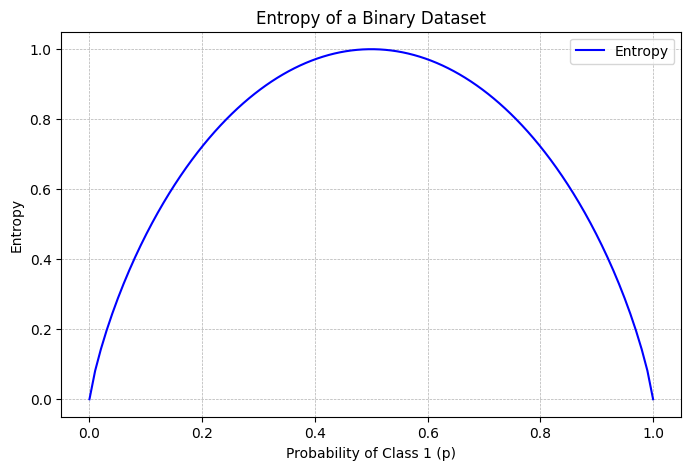

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate entropy
def calculate_entropy(p):
    """
    Calculate the binary entropy of a dataset given the probability of class 1
    :param p: Probability of class 1
    :return: Entropy of the dataset
    """
    # Handle the case where probability is 0 or 1, as log(0) is undefined
    if p == 0 or p == 1:
        return 0
    else:
        return -(p*np.log2(p) + (1-p)*np.log2(1-p))

# Generate probabilities from 0 to 1
probabilities = np.linspace(0, 1, 100)
# Calculate entropy for each probability
entropies = [calculate_entropy(p) for p in probabilities]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(probabilities, entropies, label='Entropy', color='blue')
plt.title('Entropy of a Binary Dataset')
plt.xlabel('Probability of Class 1 (p)')
plt.ylabel('Entropy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


# Implementing Decision Trees in Python: 

In the previous sections, we delved into the theoretical underpinnings of decision trees and explored key concepts such as entropy and information gain, which are crucial for optimizing the creation and performance of decision trees. As we transition from theory to practice, this section will guide you through implementing decision trees in Python, leveraging the widely-used `scikit-learn` library. Here, we'll focus on practical steps necessary for data preprocessing, model fitting, prediction, and evaluation within the context of `scikit-learn`. Furthermore, we'll discuss how to interpret the results generated by decision tree models and adjust significant parameters, such as maximum depth (`max_depth`) and the criterion for splitting, to optimize model performance. Lastly, we'll touch upon strategies for model complexity management, like pruning, which helps in preventing overfitting and improves the model's generalizability.

## Scikit-learn For Decision Trees

`scikit-learn` offers a straightforward and consistent API for implementing decision trees for both classification (`DecisionTreeClassifier`) and regression (`DecisionTreeRegressor`) tasks. We'll use functions like `fit()` for training the model on our data and `predict()` for making predictions. I

`scikit-learn` internally handles many of the complexities associated with decision trees, such as calculating entropy and information gain, making our job much simpler. We will also utilize other libraries like `pandas` for data manipulation and `matplotlib` (possibly with `graphviz`) for visualizing the decision tree structure.



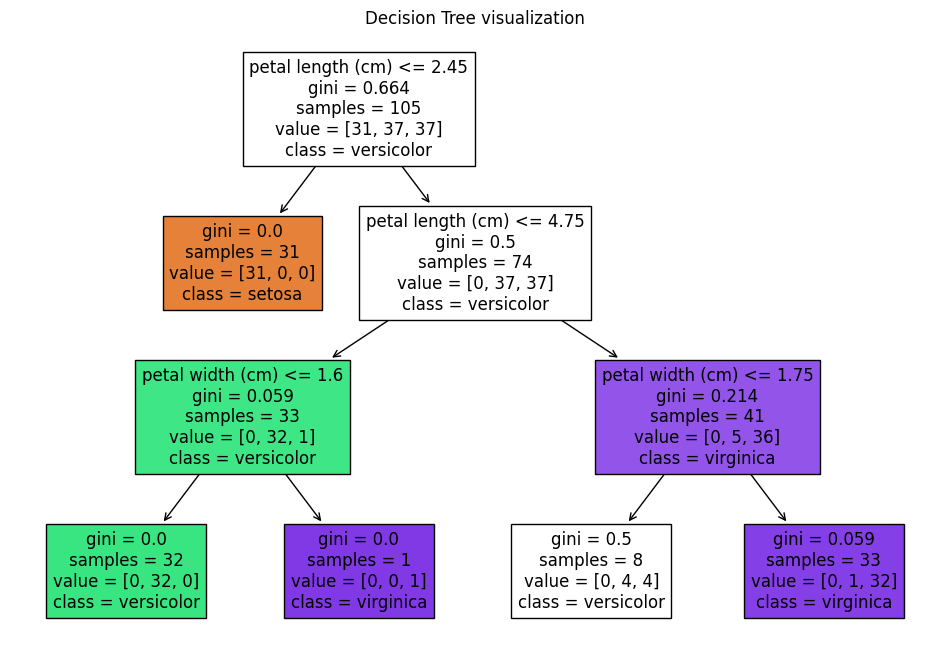

In [21]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# Load the iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with parameters emphasizing important aspects:
# - criterion: The function to measure the quality of a split. "gini" for Gini Impurity and "entropy" for Information Gain.
# - max_depth: The maximum depth of the tree. Limiting this can help prevent overfitting.
# - random_state: Controls the randomness of the estimator. Useful for reproducibility.
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)

# Fit the model with the training data
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree visualization")
plt.show()

# The visualization helps in understanding how the decision tree makes splits
# It provides insights into the feature importance and decision-making process of the model.



## Brief Note on Under/Over Fitting

You should be aware that decision trees can overfit just like any model. For example, if you had one decision node for every data point in the test set, you could easily sort them with 100% accuracy. But how does that reflect the relationships the data samples from? We want a tree large enough to capture meaning, without being so large that it's only memorizing.

**max depth** limits the maximum number of decisions your tree can contain. This is sort of a blunt instrument for keeping the size of the tree down, but it works. In reality, different sides of the tree may have different needs for complexity, so "depth" and "useful complexity" do not have a perfect correlation.

**cost complexity pruning** is the use of a hyperparameter $\alpha$ (alpha) which penalizes a tree's complexity. Read more about the concept at [scikit-learn's documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html). This lesson has already gone on long enough without delving into tuning `ccp_alpha`, but you should *definitely* try it yourself.


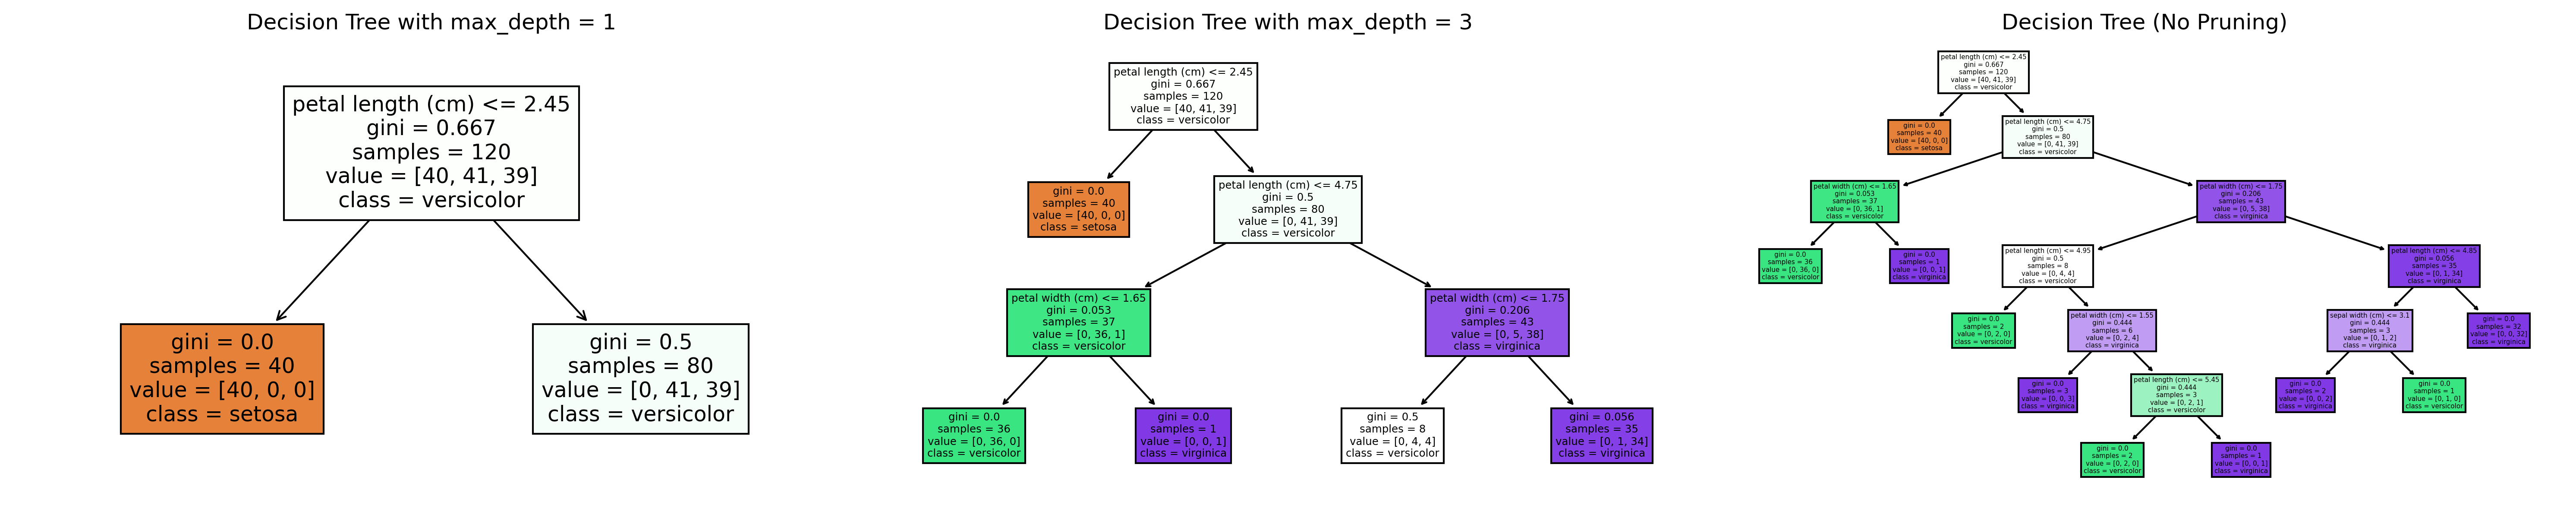

In [20]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree fitting with different max_depth values to illustrate overfitting and pruning
depth_values = [1, 3, None] # None implies full growth of the tree (potential overfitting)
fig, axes = plt.subplots(nrows=1, ncols=len(depth_values), figsize=(20, 4), dpi=300)

for index, max_depth in enumerate(depth_values):
    # Fit the Decision Tree model
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    dt_clf.fit(X_train, y_train)
    
    # Plot the trained Decision Tree
    plot_title = f"Decision Tree with max_depth = {max_depth}" if max_depth is not None else "Decision Tree (No Pruning)"
    plot_tree(dt_clf, ax=axes[index], feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
    axes[index].set_title(plot_title)

plt.tight_layout()
plt.show()

# Interpretation: 
# The first tree (max_depth=1) is an example of underfitting - too simple to capture patterns.
# The second tree (max_depth=3) may represent a balanced model - a good middle ground.
# The third tree with no pruning (max_depth=None) may overfit the data by learning too much detail, including noise.





This code snippet demonstrates fitting a Decision Tree model to the Iris dataset with scikit-learn and how the `max_depth` parameter affects the model's complexity and potential for overfitting. By visualizing trees with different `max_depth` values (including without a limit, leading to full growth), we illustrate the concept of pruning and its role in preventing overfitting. Through these visualized trees, one can observe how limiting the depth of the tree (pruning) can help in making the model simpler and potentially more generalizable to unseen data, balancing between underfitting and overfitting.


## Exercise For The Reader

Iris dataset - let's classify with a decision tree. The example below is pretty complete: if you're feeling confident, attempt the same techniques on [other scikit-learn toy datasets](https://scikit-learn.org/stable/datasets/toy_dataset.html).

This dataset includes various attributes such as sepal length, sepal width, petal length, and petal width, alongside the species of the flower, which serves as the label for our classification task. Using the scikit-learn library, your task consists of loading the dataset, splitting it into training and test sets, creating a decision tree classifier, training the model on the dataset, evaluating its performance, and calculating information gain for insights into the decision-making process.

**Data Loading**
Start by importing necessary libraries such as `pandas` for data manipulation, `scikit-learn` for machine learning models and functions, and `matplotlib` or similar libraries for visualization. Use scikit-learn's `load_iris` function to import the Iris dataset into your working environment.

**Dataset Splitting**
Divide your dataset into two parts: one for training the model and the other for testing its performance. Tools like `train_test_split` from scikit-learn will be crucial here. Remember to specify a size for the test set and a random state for reproducibility.

**Creating and Training the Decision Tree**
Definition: A decision tree classifier operates by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Initialize a DecisionTreeClassifier from scikit-learn and use the `.fit()` method with your training data to train the model.

**Model Evaluation**
Evaluate the accuracy of your model by using the `.score()` method with your test data. Additionally, leverage the `classification_report` and `confusion_matrix` for a detailed performance analysis.

**Calculating Information Gain**
Definition: Information gain, as previously discussed, measures the change in entropy before and after splitting a dataset based on an attribute. Although scikit-learn's DecisionTreeClassifier does not directly expose information gain for each split, you can utilize the `tree_` attribute of the trained model to explore the tree structure, including the features (attributes) and their importance scores. The feature importance scores can provide insights related to the information gain, with higher scores indicating attributes that contribute more significantly to partitioning the data.

**Visualization**
Beyond numerical analysis, visualize the decision tree using tools like `plot_tree` from scikit-learn or external libraries like Graphviz. This will aid in understanding how the model makes decisions, showcasing the beauty and intuition of decision trees.

By completing this exercise, you will have practically explored the creation, application, and evaluation of a decision tree classifier, reinforcing the theoretical insights gained from the lesson and gaining hands-on experience with a popular Python library for machine learning.



Model accuracy: 1.00


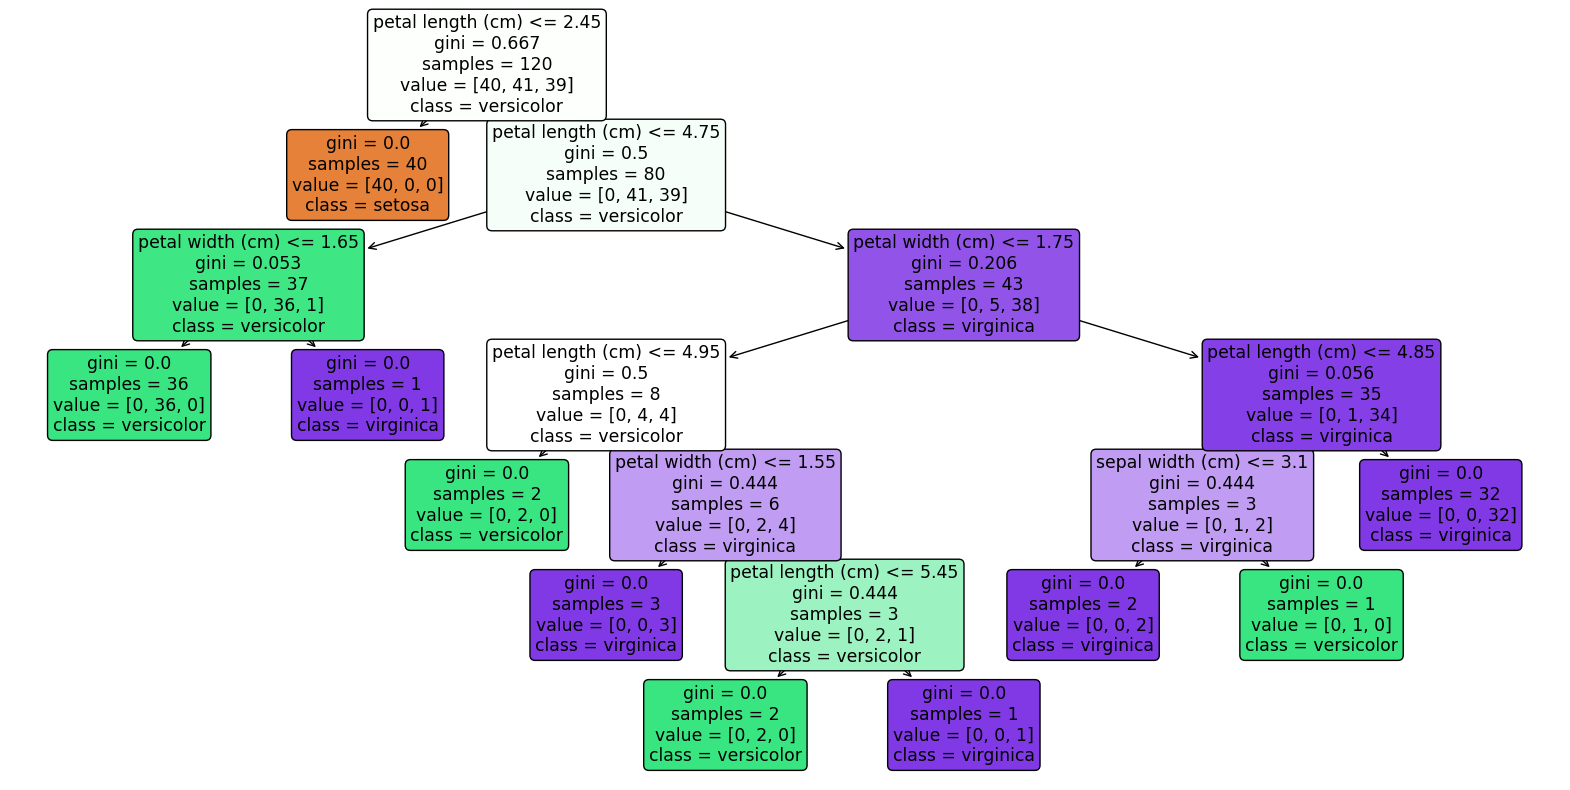

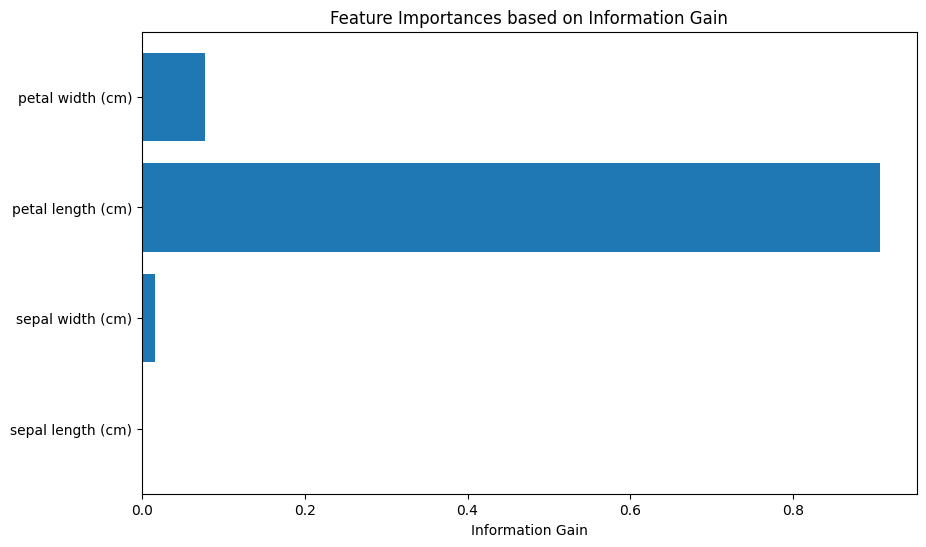

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data loading
iris = load_iris()
X = iris.data
y = iris.target

# Dataset splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Fitting the model to the data
clf.fit(X_train, y_train)

# Model evaluation
accuracy = clf.score(X_test, y_test)
print(f'Model accuracy: {accuracy:.2f}')

# Visualization: Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.show()

# Information Gain - Feature Importance visualization
feature_importances = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=iris.feature_names)
plt.xlabel('Information Gain')
plt.title('Feature Importances based on Information Gain')
plt.show()

# Interpretation
# The first plot visualizes the constructed decision tree, showing how the model makes decisions.
# The second chart highlights the importance of each attribute in classification, indicating their respective information gain.

